![banner-pdi](https://user-images.githubusercontent.com/58775072/141189378-b5df3287-e8c0-48a1-ad11-825ba317463b.png)

## Universidade Federal de Campina Grande (UFCG)
## Centro de Engenharia Elétrica e Informática (CEEI) 
## Disciplina: Int. ao Processamento de Imagem Digital e Visão Computacional
## Professora: Luciana Ribeiro Veloso
## Aluno(a): Coloque seu nome aqui

# <span style='color:red'>Laboratório 3.1: Processamento Digital de Imagens</span>
***

## Observações
***

1. Os arquivos de laboratório devem ser salvos seguindo o seguinte padrão: `lab-x-nome-sobrenome.ipynb`.
2. Não esqueça de colocar o seu nome no cabeçalho acima.
3. Não altere a ordem das células e realize as implementações somente nos campos específicados.  
4. Ao longo do laboratório será solicitado perguntas teóricas relativas aos assuntos das aulas da disciplina e implementações de código utilizando a linguagem de programação Python. 
5. As células de implementação com código serão indicadas pelos seguintes comentários: `# IMPLEMENTE O SEU CÓDIGO AQUI`.
6. Para editar uma célula de texto, basta clicar duas vezes com o cursos do mouse para editar, e `Ctrl + Enter` para finalizar a edição. 
7. Para rodar as células com os códigos desenvolvidos, digite `Ctrl + Enter` ou clique em `Run` no menu do Jupyter.
8. Dúvidas, problemas de execução de código ou dificuldades com a linguagem de programação Python devem ser feitas durante as aulas de laboratório, encaminhadas para o grupo de WhatsApp da turma ou fórum do PVAE da disciplina.
9. Os laboratórios devem ser enviados nos campos especificados pelo PVAE. ATENTE-SE AOS PRAZOS DE ENTREGA!

### Importação dos Pacotes

In [ ]:
import cv2 as cv                     # opencv para manipulação de imagens
import numpy as np                   # numpy para manipulação de matrizes e arrays
import matplotlib.pyplot as plt      # pyplot para plotagem de gráficos e imagens
import urllib.request as url         # urllib para baixar arquivos via HTTPS
import zipfile                       # zipfile para lidar com pastas compactadas
import random                        # trabalhando com números randômicos
import math                          # math para lidar com funções matemáticas

In [ ]:
# baixando as imagens de referência
url.urlretrieve('https://github.com/Alyssonmach/pdi-labs/raw/main/imagens.zip', 'imagens.zip')
with zipfile.ZipFile('imagens.zip', 'r') as zip_ref:
    zip_ref.extractall('')

### Adição de ruído a imagem

O ruído em uma imagem é apenas uma espécie de interferência que se manifesta sob a forma de pixels de cores bem diferentes da realidade. Tecnicamente, ruído é descrito como uma variação aleatória do brilho ou cor. Um ruído comum de ocorrem em imagens digitais é o chamado ruído sal e pimenta, na qual se caracteriza como pontos aleatórios na imagem de cor preta e branca (valores extremos de intensidade na imagem).

In [ ]:
# Abaixo uma função definida para gerar ruído a imagem
def sp_noise(image, prob):
    
    output = np.zeros(image.shape, np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob: output[i][j] = 0
            elif rdn > thres: output[i][j] = 255
            else: output[i][j] = image[i][j]
                
    return output

In [ ]:
img = cv.imread('imagens/lenna.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB) 

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 15))

axs[0].imshow(img)
axs[0].set_title('Imagem Original', size = 15)
img_noise = sp_noise(image=img, prob = 0.01)
axs[1].imshow(img_noise)
axs[1].set_title('Imagem com Ruído (prob = 0.01)', size = 15)
img_noise = sp_noise(image=img, prob=0.1)
axs[2].imshow(img_noise)
axs[2].set_title('Imagem com Ruído (prob = 0.1)', size = 15)

### Transformação de potência

Os pixels de uma imagem podem ser submetidos a uma função de transformação ponto-a-ponto, da forma $y = x^γ$ , onde um fator $γ$ positivo e maior que $1$ produzirá uma imagem resultante mais escura que a imagem original, enquanto um fator $γ$ entre $0$ e $1$ produzirá uma imagem resultante mais clara que a imagem original. No python essa função de transformação  está disponível através da função **intensity_transform.gammaCorrection** da biblioteca do OpenCv

**Sintaxe:** `cv.intensity_transform.gammaCorrection(img_in, img_out, gamma)`

**Descrição:** Dada uma imagem colorida (BGR) ou em tons de cinza de entrada e a constante gama, aplique a transformação de lei de potência, também conhecida como correção de gama à imagem no domínio [0, 255] e retorne a imagem resultante.

**Obs.:** Antes de executar essa função é necessário definir a imagem de entrada. Você pode usar o seguinte comando:

`img_out = np.zeros (img_in.shape, img_in.dtype)`,

que cria uma imagem preenchida com zeros com a mesma forma e tipo da imagem de entrada.

### Alargamento de contraste


O alagamento de contraste é uma técnica de aprimoramento de imagem que tenta melhorar o contraste ampliando os valores de intensidade de uma imagem para preencher toda a faixa dinâmica. A função de transformação usada é sempre linear e monotonicamente crescente.

A figura abaixo mostra uma função de transformação típica usada para alongamento de contraste.

![image.png](https://user-images.githubusercontent.com/58775072/125873345-4a539ffb-b415-42a8-939e-96c82ab4e034.png)

**Sintaxe:**  `cv.intensity_transform.contrastStretching(img_in, img_out, r1, s1, r2, s2)`

**Descrição:** Dada uma imagem colorida (BGR) ou em tons de cinza de entrada, aplique alongamento de contraste linear no domínio [0, 255] e retorne a imagem resultante.

**Parâmetros:** 

`img_in` ->	entrada de imagem em BGR ou em tons de cinza.

`img_out` ->	imagem resultante do alongamento do contraste.

`r1`	-> coordenada x do primeiro ponto (r1, s1) na função de transformação.

`s1`  ->	coordenada y do primeiro ponto (r1, s1) na função de transformação.

`r2`	-> coordenada x do segundo ponto (r2, s2) na função de transformação.

`s2`	-> coordenada y do segundo ponto (r2, s2) na função de transformação.



 ## <span style='color:blue'>Questão 1: [Valor da Questão: 1.5][Taxa de acerto: x.x]</span>
* (a) Processe a imagem **Fig0304(a)(breast_digital_Xray).tif** usando as funções de transformação abaixo. Mostre as três imagens resultantes e comente os resultados encontrados

    * (a-1) `cv.intensity_transform.contrastStretching (img_in, g1, 0, 255, 255, 0)`

    * (a-2) `cv.intensity_transform.contrastStretching (img_in, g2, 128, 191, 0, 255)`

    * (a-3) `cv.intensity_transform.gammaCorrection (img, g3, 2)`

* (b) Verificar o efeito de aplicar transformações de intensidade a uma imagem com valores de γ menores que 1 em uma imagem da sua escolha.

In [ ]:
# IMPLEMENTE SEU CÓDIGO AQUI --> QUESTÃO 1 - letra (a-1)

In [ ]:
# IMPLEMENTE SEU CÓDIGO AQUI --> QUESTÃO 1 - letra (a-2)

In [ ]:
# IMPLEMENTE SEU CÓDIGO AQUI --> QUESTÃO 1 - letra (a-3) e (b)

## <span style='color:green'>Respostas da Questão 1:</span>

* (a) Adicione sua resposta aqui.
* (b) Adicione sua resposta aqui.

### Transformações logarítmicas

As transformações logarítmicas e de alargamento de contraste são ferramentas básicas para manipulação da faixa dinâmica da imagem. Os pixels de uma imagem podem ser submetidos a uma função de transformação logarítmica ponto-a-ponto, da forma $y = log ( 1 + x )$, através do comando **cv.intensity_transform.logTransform** da biblioteca do OpenCv

**Sintaxe:** `cv.intensity_transform.logTransform(img_in, img_out)`

**Descrição:** Dada uma imagem BGR ou em tons de cinza de entrada, aplique a transformação de log à imagem no domínio [0, 255] e retorne a imagem resultante.

**Parâmetros:**

`img_in` ->  imagem de entrada BGR ou em tons de cinza.  
`img_out` -> imagem resultante de transformações de log.


 ## <span style='color:blue'>Questão 2: [Valor da Questão: 2.0][Taxa de acerto: x.x]</span>
 
 * (a) Processe a imagem **face.bmp** usando as funções de transformação abaixo. É necessário converter a imagem de entrada para int32 para que se possa fazer a operação.

    * `F1=2f-40`
    * `F2=30log10(f+1)`
    * `F3=f^1.4`
    * `F4=f^0.6`

* Processe a imagem **Fig0305(a)(DFT_no_log).tif** usando a transformação logarítmica. Analise e comente os resultados.


In [ ]:
# IMPLEMENTE SEU CÓDIGO AQUI --> QUESTÃO 2 - letra (a)

In [ ]:
# IMPLEMENTE SEU CÓDIGO AQUI -> QUESTÃO 2 - letra (b)

## <span style='color:green'>Respostas da Questão 2:</span>
* (b) Adicione sua resposta aqui.

### Cálculo do Histogramas

O histograma é uma ferramenta estatística, também  conhecida como distribuição de frequências,  que representa graficamente a distribuição dos dados em classes (ou bins). Podemos usar a função **calcHist** da biblioteca do OpenCV para calcular o histograma de uma imagem.

**Sintaxe**: `hist = cv.calcHist(images, channels, mask, histSize, ranges, accumulate)`

**Descrição**:  calcula o histograma de uma ou mais matrizes. 

**Parâmetros**:

`images` -> matriz de entrada (imagem de entrada)

`channels` -> Lista das dimensões dos canais usados para calcular o histograma

`mask` -> Máscara opcional. Se a matriz não estiver vazia, deve ser uma matriz de 8 bits com o mesmo tamanho das imagens. Os elementos da máscara não-zero marcam os elementos da matriz contados no histograma. 

`histSize` -> Histograma de saída, que é uma matriz densa ou esparsa dims -dimensional.

`ranges` -> Matriz com as dimensões da caixa de histograma.

`accmulate` -> Bandeira de acumulação (Nesse experimento usamos False).

Para maiores detalhes: https://docs.opencv.org/master/d6/dc7/group__imgproc__hist.html#ga4b2b5fd75503ff9e6844cc4dcdaed35d


In [ ]:
im = cv.imread('imagens/mandrill.tiff')
im = cv.cvtColor(im, cv.COLOR_BGR2RGB)

if im is None:
    print('Could not open or find the image:', args.input)
    exit(0)
    
im_planes = cv.split(im) 
 
histSize = 256

histRange = (0, 256) 
    
b_hist = cv.calcHist(im_planes, [0], None, [histSize], histRange, accumulate = False)
g_hist = cv.calcHist(im_planes, [1], None, [histSize], histRange, accumulate = False)
r_hist = cv.calcHist(im_planes, [2], None, [histSize], histRange, accumulate = False)    

[M, N, channels] = im.shape  
    
r_hist = 100 * r_hist / (M * N)
g_hist = 100 * g_hist / (M * N)
b_hist = 100 * b_hist / (M * N)

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (6, 6))
axs[0].imshow(im, vmin = im.min(), vmax = im.max())
axs[0].set_title('Imagem Original', size= 15)
fig.set_figheight(6)
fig.set_figwidth(12)
axs[1].plot(r_hist,'r')
axs[1].plot(b_hist,'b')
axs[1].plot(g_hist,'g')
axs[1].set_title('Histograma', size = 15)
axs[1].set_xlabel('Intensidades dos Pixels')
axs[1].set_ylabel('Frequência')

### Equalização de histogramas

Para aprimorar o contraste de uma imagem, uma das técnicas mais comuns é a equalização de seu histograma. Esta equalização reorganiza os valores de intensidade da imagem, produzindo imagens com histogramas mais lineares. Podemos usar a função **equalizeHist** da biblioteca do OpenCV para equalizar a imagem em escala de cinza.

**Sintaxe**: `im_out = cv.equalizeHist(im_in)`

**Descrição**:  Equaliza a imagem de entrada

**Parâmetros** 

`im_in` -> imagem a ser equalizada com 8 bits com apenas 1 canal  
`im_out` -> imagem equalizada do mesmo tipo e tamanho da imagem de entrada
 

In [ ]:
im_eq = np.zeros(im.shape, im.dtype)

im_eq[:,:,0] = cv.equalizeHist(im[:,:,0])
im_eq[:,:,1] = cv.equalizeHist(im[:,:,1])
im_eq[:,:,2] = cv.equalizeHist(im[:,:,2])

im_yuv_eq = cv.cvtColor(im, cv.COLOR_BGR2YCrCb)

im_yuv_eq[:,:,0] = cv.equalizeHist(im_yuv_eq[:,:,0])
#im_yuv_eq[:,:,1] = cv.equalizeHist(im_yuv_eq[:,:,1])
#im_yuv_eq[:,:,2] = cv.equalizeHist(im_yuv_eq[:,:,2])

im_eq = cv.cvtColor(im_eq, cv.COLOR_BGR2RGB)
im_yuv_eq = cv.cvtColor(im_yuv_eq, cv.COLOR_YCrCb2RGB)

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(30, 30))
axs[0].imshow(im, vmin = im.min(), vmax = im.max())
axs[0].set_title("Imagem original", size = 40)
axs[1].imshow(im_eq, vmin = im.min(), vmax = im.max())
axs[1].set_title("Imagem RGB equalizada",size = 40)
axs[2].imshow(im_yuv_eq, vmin = im.min(), vmax = im.max())
axs[2].set_title("Imagem YCrCb equalizada", size = 40)

## <span style='color:blue'>Questão 3: [Valor da Questão: 2.0][Taxa de acerto: x.x]</span>

* (a) Converta a imagem **babuino.jpg** para nível de cinza e equalize essa imagem. Mostre a imagem em nível de cinza e a imagem equalizada e seus respectivo histogramas. Descreva o que ocorreu com a imagem equalizada.

* (b) O que acontece se a imagem equalizada for equalizada diversas vezes? Teste e comente os resultados.

In [ ]:
# IMPLEMENTE SEU CÓDIGO AQUI -> QUESTÃO 3 - LETRA (a)

In [ ]:
# IMPLEMENTE SEU CÓDIGO AQUI -> QUESTÃO 3 - letra (b)

## <span style = 'color:green'>Resposta da Questão 3:</span>

* (a) Adicione sua resposta aqui.
* (b) Adicione sua resposta aqui.

### Filtragem espacial 
A operação de filtragem espacial é realizada pela função **filter2D()** da bibioteca OpenCV, que realiza a operação de convolução de uma imagem com uma máscara (elemento estruturante).

**Sintaxe:** `im_out = cv.filter2D(im_in, ddepth, kernel)`

**Descrição:** Realiza a operação de filtragem linear entre a imagem de entrada e a máscara

**Parametros**:

`im_in`	-> imagem de entrada.

`im-out`	-> imagem de saída de mesmo tamanho e o mesmo número de canais que im_in.

`ddepth`	-> profundidade desejada da imagem de destino.

`kernel`	-> máscara de convolução (ou melhor, um kernel de correlação), uma matriz de ponto flutuante de um único canal; se você quiser aplicar diferentes núcleos a diferentes canais, divida a imagem em planos de cores separados  e processe-os individualmente.




In [ ]:
im = cv.imread('imagens/lenna.tif')

kernel = np.ones((3, 3), np.float32) / 9

im_out = cv.filter2D(im, -1, kernel)

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 15))
axs[0].imshow(im)
axs[0].set_title("Imagem original", size = 15)
axs[1].imshow(im_out)
axs[1].set_title("Imagem filtrada com o filtro da média",size = 15)

### Suavização de imagens

Uma das aplicações mais comuns das técnicas de processamento de imagens está nas áreas de remoção de ruídos e aprimoramento da qualidade de uma imagem. Nesta prática abordaremos duas técnicas de remoção de ruído, que equivalem a filtros passa-baixa, que são:
* **Filtragem pela média**: nesta técnica, o pixel central de uma janela (normalmente 3 x 3) é substituído pela média dos valores de intensidade de seus 8 vizinhos. Isso pode ser feito plea função `im_out = cv.blur(im_in, size)`.
* **Filtragem pela mediana**: nesta técnica, o pixel central de uma janela (normalmente 3 x 3) é substituído pela mediana dos valores de intensidade de seus 8 vizinhos. Isso pode ser feito plea função `im_out = cv.medianBlur(im_in, ksize)`.

* **Filtragem Gaussiana**: nesta técnica, o pixel central de uma janela (normalmente 3 x 3) é substituído pelo resultado da convolucão da imagem com uma máscara Gaussiana com determinado desvio padrão. Isso pode ser feito plea função `im_out = cv.GaussianBlur(im_in, size, sigma)`.

Para maiores detalhes dessas funções consulte https://docs.opencv.org/4.5.2/index.html

In [ ]:
im=cv.imread('imagens/dali.png')

nsize = 21
size = (nsize,nsize)
sigma = 10
im_out1 = cv.blur(im, size)
im_out2 = cv.medianBlur(im, nsize)
im_out3 = cv.GaussianBlur(im, size, sigma)

im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
im_out1 = cv.cvtColor(im_out1, cv.COLOR_BGR2RGB)
im_out2 = cv.cvtColor(im_out2, cv.COLOR_BGR2RGB)
im_out3 = cv.cvtColor(im_out3, cv.COLOR_BGR2RGB)

fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 15))
axs[0,0].imshow(im)
axs[0,0].set_title("Imagem Original", size = 15)
axs[0,1].imshow(im_out1)
axs[0,1].set_title("Filtro da Média",size = 15)
axs[1,0].imshow(im_out2)
axs[1,0].set_title("Filtro da Mediana",size = 15)
axs[1,1].imshow(im_out3)
axs[1,1].set_title("Filtro Gaussiano",size = 15)

## <span style='color:blue'>Questão 4: [Valor da Questão: 2.0][Taxa de acerto: x.x]</span>

* (a) Nesta questão vamos avaliar os filtros da média, da mediana e o gaussiano na filtragem de imagens com ruído sal e pimenta na imagem **boat.512.tiff**. Portanto incialmente aplique o ruido sal e pimenta na imagem, para tanto utilize o seguinte comando `im_noise = sp_noise(im, 0.05)`. A seguir, utilize os filtros da média, da mediana e o gaussiano para filtrar esse ruído, escolhar os seus parâmetros com cuidado, para reduzir o ruído sem comprometer a imagem.
* (b) Comente os resultados obtidos e quais filtros obtiveram um melhor resultado na filtragem do ruído.

In [ ]:
# IMPLEMENTE SEU CÓDIGO AQUI -> QUESTÃO 4 - letra (a)

## <span style = 'color:green'>Resposta da Questão 4:</span>

* (b) Adicione sua resposta aqui.

### Aguçamento de imagens

As bordas e outras mudanças abruptas de intensidade em imagens são associadas a componentes de alta frequência, o aguçamento de imagens tem como objetivo tem como objetivo salientar essas saliências nas imagens. Essas regiões podem ser filtros que realizam a diferenciação de uma imagem, realçando as bordas e outras descontinuidades (**como o ruído**) enquanto atenua as áreas com intensidades de variação mais suave. O gradiente de sobel consite na operação de convloução da imagem com  duas máscaras $g_x$ e $g_y$. Após o processo de convolução deve-se calcular o valor absoluto do resultado. 
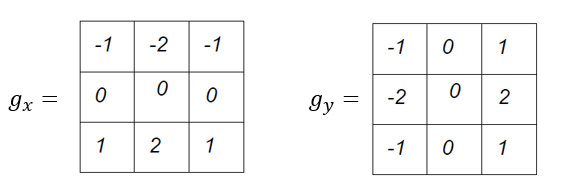



In [ ]:
im=cv.imread('imagens/sudoku.png')
im1 = im.astype(np.int16)
    
gx = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
gy = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

Gx = abs(cv.filter2D(im1, -1, gx))
Gy = abs(cv.filter2D(im1, -1, gy))
im_out = Gx + Gy

Gx = Gx.astype(np.uint8)
Gy = Gy.astype(np.uint8)
im_out = im_out.astype(np.uint8)

# show image
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (15,15))
axs[0,0].imshow(im)
axs[0,0].set_title("Imagem original", size = 15)
axs[0,1].imshow(Gx)
axs[0,1].set_title("Imagem filtrada com o filtro $g_x$", size = 15)
axs[1,0].imshow(Gy)
axs[1,0].set_title("Imagem filtrada com o filtro $g_x$", size = 15)
axs[1,1].imshow(im_out)
axs[1,1].set_title("Imagem filtrada com o filtro $|Gx|+|Gy|$", size = 15)

## <span style='color:blue'>Questão 5: [Valor da Questão: 2.5][Taxa de acerto: x.x]</span>

* Implemente a filtragem conforme foi descrito na aula e por conviniência mostrado no slide abaixo. E teste sua implementação na imagem **Fig0340(a)(dipxe_text).tif**. Utilize como filtro passa baixa o filtro gaussiano.

    * Filtragem de alto reforço
        * Máscara de nitidez (*unsharp masking*):  
            > $g_{máscara} = f(x,y) - f(x,y)_{passa-baixa}$
        * Filtro alto-reforço (*high-boost*): acrescenta uma imagem a saída do filtro passa alta:
            > $g(x,y) = f(x,y) + B.g_{máscara}$
            * Escolher $B < 1$ atenua a contribuição da máscara;
            * O ruído desempenha um papel significativo na aparência visual da imagem filtrada pelo filtro de alto reforço,                   realçando o ruído juntamente com outras transições abruptas;

In [ ]:
# COLOQUE SEU CÓDIGO AQUI --> QUESTÃO 5 

***
![image](https://user-images.githubusercontent.com/58775072/135618990-92198239-b4bf-4ce9-aa70-2b3df34e3bde.gif)